<a href="https://colab.research.google.com/github/Nico5144/mnist-ml-project/blob/main/notebooks/2_baseline_model_true.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
from tensorflow.keras.datasets import mnist

# Load MNIST

(X_train, y_train), (X_test, y_test) = mnist.load_data()

# Flatten: reshape from (n_samples, 28, 28) → (n_samples, 784)

X_train_flat = X_train.reshape(-1, 28*28)
X_test_flat  = X_test.reshape(-1, 28*28)

# Normalize: pixel values originally 0–255 → scale to 0.0–1.0

X_train_flat = X_train_flat.astype('float32') / 255.0
X_test_flat  = X_test_flat.astype('float32')  / 255.0

print("Training set shape:", X_train_flat.shape)  # should be (60000, 784)


Training set shape: (60000, 784)


In [2]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# L‑BFGS tends to be faster on this kind of data

baseline_clf = LogisticRegression(
    solver='lbfgs',
    multi_class='multinomial',
    max_iter=200,    # fewer passes, usually enough
    tol=1e-3,        # convergence tolerance
    random_state=42
)

baseline_clf.fit(X_train_flat, y_train)
print("Iterations used:", baseline_clf.n_iter_)      # see how many it actually needed
print("Accuracy (lbfgs):", accuracy_score(y_test, baseline_clf.predict(X_test_flat)))


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


Iterations used: [43]
Accuracy (lbfgs): 0.9213


In [4]:
# from sklearn.linear_model import LogisticRegression
# from sklearn.metrics import accuracy_score

# # Instantiate with more iterations so it converges on 784‑dim data

# baseline_clf = LogisticRegression(max_iter=1000, solver='saga')

# # Fit on the training set

# baseline_clf.fit(X_train_flat, y_train)

# # Predict on test set

y_pred_baseline = baseline_clf.predict(X_test_flat)

# # Compute accuracy

# acc_baseline = accuracy_score(y_test, y_pred_baseline)
# print(f"Baseline LogisticRegression accuracy: {acc_baseline:.4f}")


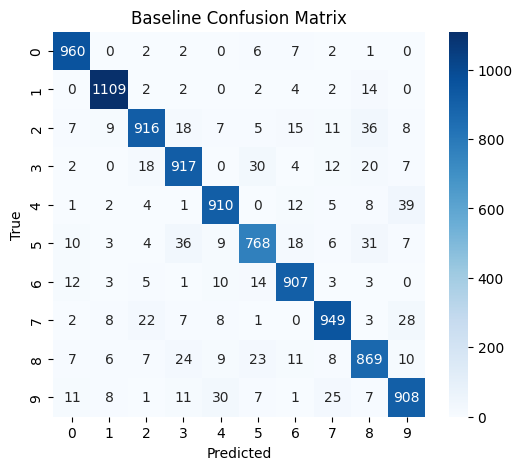

              precision    recall  f1-score   support

           0       0.95      0.98      0.96       980
           1       0.97      0.98      0.97      1135
           2       0.93      0.89      0.91      1032
           3       0.90      0.91      0.90      1010
           4       0.93      0.93      0.93       982
           5       0.90      0.86      0.88       892
           6       0.93      0.95      0.94       958
           7       0.93      0.92      0.93      1028
           8       0.88      0.89      0.88       974
           9       0.90      0.90      0.90      1009

    accuracy                           0.92     10000
   macro avg       0.92      0.92      0.92     10000
weighted avg       0.92      0.92      0.92     10000



In [5]:
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt

# Compute confusion matrix

cm = confusion_matrix(y_test, y_pred_baseline)

# Plot heatmap

plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Baseline Confusion Matrix')
plt.show()

# Print precision/recall/F1

print(classification_report(y_test, y_pred_baseline))


In [6]:
from sklearn.ensemble import RandomForestClassifier

rf_clf = RandomForestClassifier(n_estimators=100, n_jobs=-1)
rf_clf.fit(X_train_flat, y_train)
y_pred_rf = rf_clf.predict(X_test_flat)

acc_rf = accuracy_score(y_test, y_pred_rf)
print(f"RandomForest accuracy: {acc_rf:.4f}")

RandomForest accuracy: 0.9694
